In [1]:
"""author: GK"""
import pandas as pd
import collections
import numpy as np
from os import mkdir

In [2]:
""" Import data """

all_features_df = pd.read_csv('All_features_df.csv')
tickers = all_features_df.Name.unique()
all_features_df['date'] = pd.to_datetime(all_features_df['date'],format='%Y-%m-%d')
all_features_df.set_index(['Name','date'],inplace = True) # custom created features
orig_features_df = all_features_df.loc[:,['open','high','low','close','volume']] # O,H,L,C,Volume only

In [3]:
""" Target industries """
weblink = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
industries_df = pd.read_html(weblink)[0]
industries_df.to_csv('wiki_sp500_industries.csv')
print(industries_df.head())

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD          ABIOMED Inc     reports             Health Care   
4    ACN        Accenture plc     reports  Information Technology   

                GICS Sub Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

In [4]:
"""for prediction"""
orig_features_df

open   high    low  close    volume
Name date                                            
AAL  2013-02-08  15.07  15.12  14.63  14.75   8407500
     2013-02-11  14.89  15.01  14.26  14.46   8882000
     2013-02-12  14.45  14.51  14.10  14.27   8126000
     2013-02-13  14.30  14.94  14.25  14.66  10259500
     2013-02-14  14.94  14.96  13.16  13.99  31879900
...                ...    ...    ...    ...       ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82   2982259
     2018-02-02  77.53  78.12  76.73  76.78   2595187
     2018-02-05  76.64  76.92  73.18  73.83   2962031
     2018-02-06  72.74  74.56  72.13  73.27   4924323
     2018-02-07  72.70  75.00  72.69  73.86   4534912

[619040 rows x 5 columns]

In [5]:
all_features_df

open   high    low  close    volume  bollinger_bandwidth  \
Name date                                                                    
AAL  2013-02-08  15.07  15.12  14.63  14.75   8407500                  NaN   
     2013-02-11  14.89  15.01  14.26  14.46   8882000                  NaN   
     2013-02-12  14.45  14.51  14.10  14.27   8126000                  NaN   
     2013-02-13  14.30  14.94  14.25  14.66  10259500                  NaN   
     2013-02-14  14.94  14.96  13.16  13.99  31879900                  NaN   
...                ...    ...    ...    ...       ...                  ...   
ZTS  2018-02-01  76.84  78.27  76.69  77.82   2982259             0.109589   
     2018-02-02  77.53  78.12  76.73  76.78   2595187             0.098872   
     2018-02-05  76.64  76.92  73.18  73.83   2962031             0.093314   
     2018-02-06  72.74  74.56  72.13  73.27   4924323             0.096212   
     2018-02-07  72.70  75.00  72.69  73.86   4534912             0.100041   

                 coppock_curve     macd  market_fac_ind  momentum_indic  ...  \
Name date                                                                ...   
AAL  2013-02-08            NaN  0.00000    5.828130e-08             NaN  ...   
     2013-02-11            NaN -0.00289    8.444044e-08             NaN  ...   
     2013-02-12            NaN -0.00624    5.045533e-08             NaN  ...   
     2013-02-13            NaN  0.00311    6.725474e-08             NaN  ...   
     2013-02-14            NaN -0.01232    5.646191e-08             NaN  ...   
...                        ...      ...             ...             ...  ...   
ZTS  2018-02-01         10.532 -0.06399    5.297997e-07            3.23  ...   
     2018-02-02          8.811 -0.18890    5.356069e-07            1.39  ...   
     2018-02-05          5.751 -0.45968    1.262647e-06           -1.71  ...   
     2018-02-06          2.316 -0.65412    4.934688e-07           -3.50  ...   
     2018-02-07         -0.331 -0.71565    5.093814e-07           -2.47  ...   

                 typical_price  Accum_Distri  Will_R_Form  Weighted_Close  \
Name date                                                                   
AAL  2013-02-08      14.833333           NaN          NaN         14.8125   
     2013-02-11      14.576667           NaN          NaN         14.5475   
     2013-02-12      14.293333           NaN          NaN         14.2875   
     2013-02-13      14.616667           NaN          NaN         14.6275   
     2013-02-14      14.036667           NaN          NaN         14.0250   
...                        ...           ...          ...             ...   
ZTS  2018-02-01      77.593333  8.040917e+09   -43.097015         77.6500   
     2018-02-02      77.210000  8.025405e+09   -68.089431         77.1025   
     2018-02-05      74.643333  7.990253e+09   -90.647482         74.4400   
     2018-02-06      73.320000  7.957796e+09   -85.750000         73.3075   
     2018-02-07      73.850000  7.930930e+09   -78.375000         73.8525   

                     GAPO    On_Bal_Vol        RSI  Donchian_Width  \
Name date                                                            
AAL  2013-02-08       NaN           NaN        NaN             NaN   
     2013-02-11       NaN           NaN        NaN             NaN   
     2013-02-12       NaN           NaN        NaN             NaN   
     2013-02-13       NaN           NaN        NaN             NaN   
     2013-02-14       NaN           NaN        NaN             NaN   
...                   ...           ...        ...             ...   
ZTS  2018-02-01  0.636198  2.126335e+09  64.912281            5.36   
     2018-02-02  0.603742  2.083458e+09  56.278229            4.92   
     2018-02-05  0.734634  2.040218e+09  43.835616            6.95   
     2018-02-06  0.787949  1.994824e+09  36.742424            8.00   
     2018-02-07  0.787949  2.042164e+09  40.749064            8.00   

                 True_Range  Aaron_Osc  
Name dat

# RNN

**Goal**: use about 80% of past years' data to predict 20% of future years' data. <br>  <br>
Split roughly<br>
Train: 4 years (Feb 2013 to Feb 2017)<br>
Test: 1 year (Feb 2017 to Feb 2018)<br>

Alternative approaches: 
1. XGboost with technical indicators (https://medium.com/@hsahu/stock-prediction-with-xgboost-a-technical-indicators-approach-5f7e5940e9e3)
2. Multinomial regression
3. ARIMA

In [6]:
orig_features_df.loc['AAPL'].index

DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

In [7]:
# https://www.tensorflow.org/guide/keras/rnn

import tensorflow as tf
from tensorflow.keras import layers,callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

In [8]:
# trial for AAPL data
dataset = orig_features_df.loc['AAPL'].to_numpy()
n_features = np.shape(dataset)[1]
# normalize the dataset - LSTMS are scale dependent
scaler = MinMaxScaler(feature_range=(0, 1),copy = True)
dataset = scaler.fit_transform(dataset.reshape(-1,n_features))

In [9]:
dataset

array([[0.09915624, 0.09198687, 0.0963892 , 0.0977103 , 0.57445896],
       [0.10203815, 0.09910555, 0.1021854 , 0.103438  , 0.46034845],
       [0.10550741, 0.09613273, 0.09580252, 0.08951884, 0.54963474],
       ...,
       [0.83646078, 0.86814541, 0.81945182, 0.81558288, 0.239909  ],
       [0.80201023, 0.86684475, 0.80322276, 0.86855117, 0.22230747],
       [0.86861193, 0.86424343, 0.84435124, 0.84028522, 0.15716254]])

In [10]:
# lookback for LSTM
lstm_period = 32

def look_back(data,period = 7):
    X,y = [],[]
    for i in range(period,len(data)):
        X.append(data[i-period:i,:])
        y.append(data[i,:])
    return np.array(X),np.array(y)
X,y = look_back(dataset,lstm_period)       

In [11]:
# Train Test Split: 80 : 20
train_ratio = 0.8
train_size = int(len(X)*train_ratio)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:,:]
y_train, y_test = y[0:train_size], y[train_size:]
print(len(X_train), len(X_test),len(y_train), len(y_test))

981 246 981 246


In [12]:
def createLSTMModel(n1_cells = 128, n2_cells = 16,dropout_rate=0, optimizer='Adam',\
                    activation='tanh', loss='mean_squared_error', 
                    epochs = 100,batch_size = 16):
    
    # simple model: Build-Compile-Fit-Predict approach
    model = tf.keras.Sequential()
    model.add(layers.LSTM(n1_cells,activation=activation,return_sequences = True,use_bias=True,\
                               input_shape = (lstm_period,n_features))) #recurrent_activation = 'sigmoid'
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.LSTM(n2_cells,activation=activation,use_bias=True))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(n_features))
    model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

    # Reshape Data: (Sample,Timestep,Features) 
    model.fit(X_train,y_train,shuffle = False,epochs = epochs,verbose = 1,batch_size = batch_size,\
                   callbacks=[callbacks.EarlyStopping(monitor='loss', patience=3)])
    return model



In [13]:
## Grid Search CV

grid_param_LSTM = {
    'n1_cells' : [64],
    'n2_cells' : [16],
    'batch_size': [32],
    'epochs': [50],   
#     'optimizer': ['Adam', 'RMSProp'],
#     'loss': ['logcosh', 'mse'],
#     'activation': ['relu', 'linear','sigmoid', 'tanh'],
#     'dropout_rate':[0,0.5]
}

model_LSTM=KerasRegressor(build_fn=createLSTMModel)


GridLSTM = GridSearchCV(estimator=model_LSTM,
                     param_grid=grid_param_LSTM,
                     scoring={'neg_mean_squared_error'},
                     refit = 'neg_mean_squared_error', cv=3,n_jobs = -1,verbose = 2)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],n_features))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],n_features))

GridLSTM.fit(X_train, y_train)
best_model = GridLSTM.best_estimator_


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


Train on 981 samples
Epoch 1/50
981/981 [==============================] - 2s 2ms/sample - loss: 0.0195 - accuracy: 0.3741
Epoch 2/50
981/981 [==============================] - 1s 568us/sample - loss: 0.0202 - accuracy: 0.1274
Epoch 3/50
981/981 [==============================] - 1s 565us/sample - loss: 0.0088 - accuracy: 0.1835
Epoch 4/50
981/981 [==============================] - 1s 565us/sample - loss: 0.0048 - accuracy: 0.4332
Epoch 5/50
981/981 [==============================] - 1s 563us/sample - loss: 0.0044 - accuracy: 0.4210
Epoch 6/50
981/981 [==============================] - 1s 561us/sample - loss: 0.0042 - accuracy: 0.4098
Epoch 7/50
981/981 [==============================] - 1s 566us/sample - loss: 0.0041 - accuracy: 0.4057
Epoch 8/50
981/981 [==============================] - 1s 565us/sample - loss: 0.0040 - accuracy: 0.3965
Epoch 9/50
981/981 [==============================] - 1s 569us/sample - loss: 0.0038 - accuracy: 0.4108
Epoch 10/50
981/981 [========================

In [14]:
try:
    mkdir('Results')
except:
    pass
best_model.model.save('Results/lstm_model.h5')

best_model_object = best_model
# from sklearn.externals import joblib
# joblib.dump(best_model, 'Results/grid_lstm_model.pkl')

In [15]:
best_model = best_model.model

In [16]:
y_pred_seen = best_model.predict(X_train)
# y_pred_unseen = best_model.predict(X_test) # This is not completely correct as it is peeking into the future
print(np.shape(y_pred_seen))
print(np.shape(y_train))

(981, 5)
(981, 5)


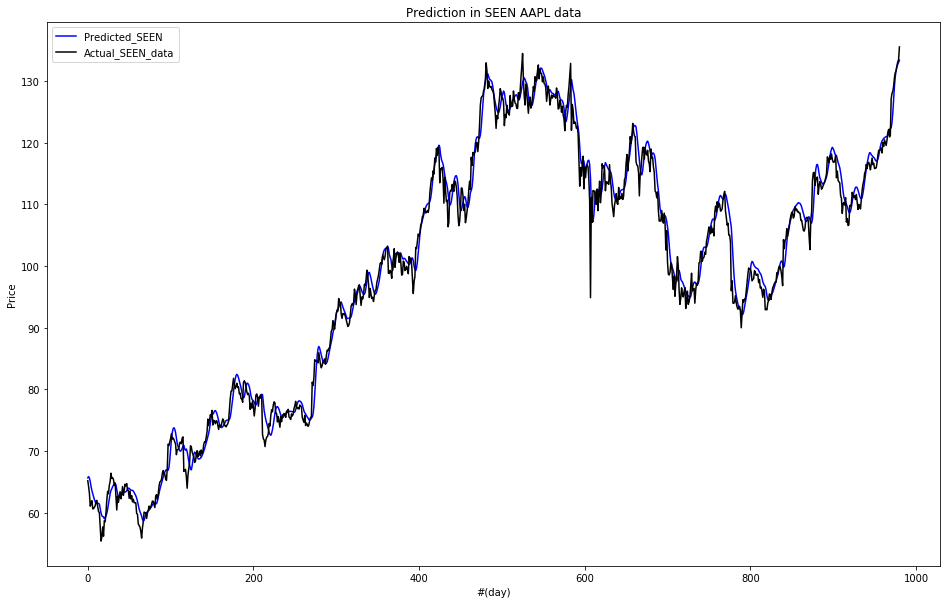

'Note the commented block here is peeking into the future data while prediciting '

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,10))
plt.plot(scaler.inverse_transform(y_pred_seen)[:,0],color = 'b',label = 'Predicted_SEEN')
plt.plot(scaler.inverse_transform(y_train)[:,0],color = 'k',label = 'Actual_SEEN_data')
plt.xlabel('#(day)')
plt.ylabel('Price')
plt.title('Prediction in SEEN AAPL data')
plt.legend()
try:
    mkdir('Results/RNN_Stock')
except:
    pass
plt.savefig('Results/RNN_Stock/SEEN_data.png',dpi = 300)
plt.show()

"""Note the commented block here is peeking into the future data while prediciting """
# pred_unseen_to_plot = len(y_train)
# plt.figure(figsize = (16,10))
# plt.plot(scaler.inverse_transform(y_pred_unseen)[:,0],color = 'r',label = 'Predicted_UNSEEN')
# plt.plot(scaler.inverse_transform(y_test)[:,0],color = 'k',label = 'Actual_UNSEEN_data')
# plt.xlabel('#(day)')
# plt.ylabel('Price')
# plt.title('Prediction in UNSEEN AAPL data')
# plt.legend()
# plt.show()


In [23]:
# predictions for 365 days
# start = X_train[-1:]
start = X_test[0:1]
preds = [[np.nan]*n_features]
for i in range(250):
    start = start.reshape((start.shape[0],start.shape[1],n_features))
    a = best_model.predict(start)
    # prepare next start point
    first_n_minus_1 = start[0,-(lstm_period-1):,0:n_features]
    first_n_minus_1 = first_n_minus_1.reshape((1,first_n_minus_1.shape[0],n_features))
    a = a.reshape((1,a.shape[0],n_features))
    start = np.concatenate((first_n_minus_1,a), axis = 1)   
    preds = np.concatenate((preds,a[0]),axis = 0)

    

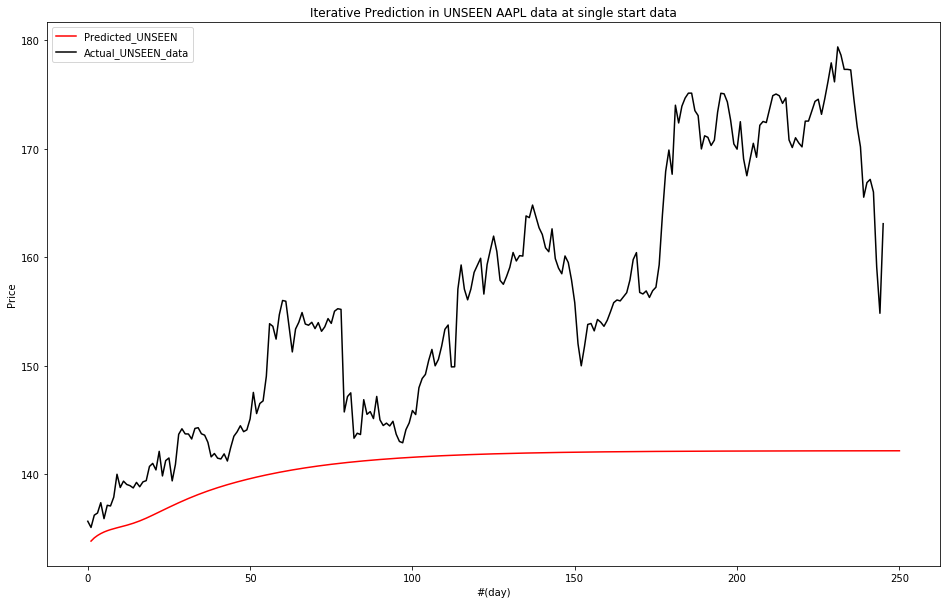

In [24]:
pred_unseen_to_plot = len(y_train)
plt.figure(figsize = (16,10))
plt.plot(scaler.inverse_transform(preds)[:,0],color = 'r',label = 'Predicted_UNSEEN')
plt.plot(scaler.inverse_transform(y_test)[:,0],color = 'k',label = 'Actual_UNSEEN_data')
plt.xlabel('#(day)')
plt.ylabel('Price')
plt.title('Iterative Prediction in UNSEEN AAPL data at single start data')
plt.legend()
plt.savefig('Results/RNN_Stock/UNSEEN_data.png',dpi = 300)
plt.show()